In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import pickle

In [2]:
df = pd.read_csv('Real_Combine.csv')

<AxesSubplot:>

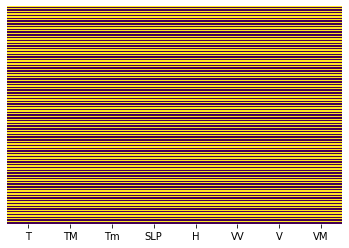

In [3]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [4]:
df = df.dropna()

In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

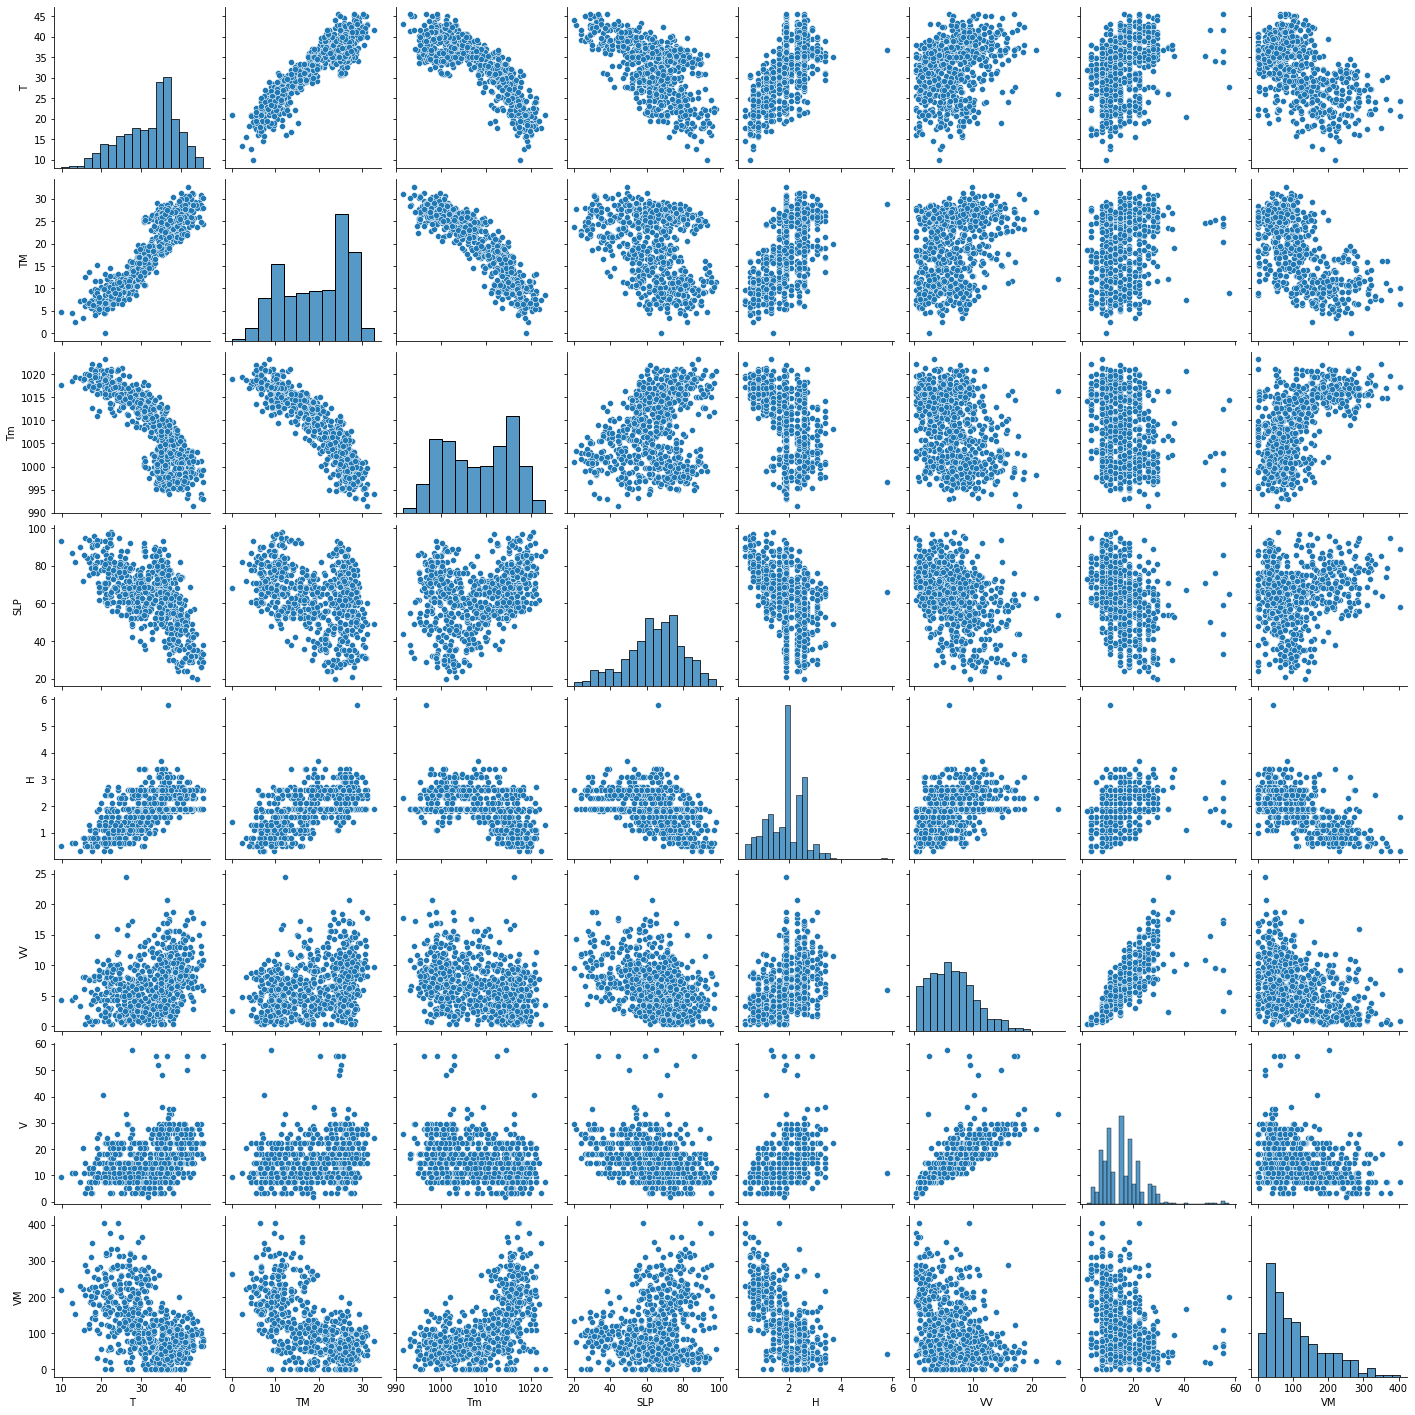

In [6]:
sns.pairplot(df)

In [7]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM
T,1.000000,0.896699,-0.829254,-0.599629,0.598479,0.320116,0.299508,-0.569381
TM,0.896699,1.000000,-0.909514,-0.315305,0.560299,0.312904,0.259431,-0.669059
Tm,-0.829254,-0.909514,1.000000,0.274196,-0.491842,-0.346130,-0.299830,0.615615
SLP,-0.599629,-0.315305,0.274196,1.000000,-0.475279,-0.399079,-0.370981,0.174658
H,0.598479,0.560299,-0.491842,-0.475279,1.000000,0.402884,0.347493,-0.628621
VV,0.320116,0.312904,-0.346130,-0.399079,0.402884,1.000000,0.760777,-0.354799
V,0.299508,0.259431,-0.299830,-0.370981,0.347493,0.760777,1.000000,-0.283695
VM,-0.569381,-0.669059,0.615615,0.174658,-0.628621,-0.354799,-0.283695,1.000000


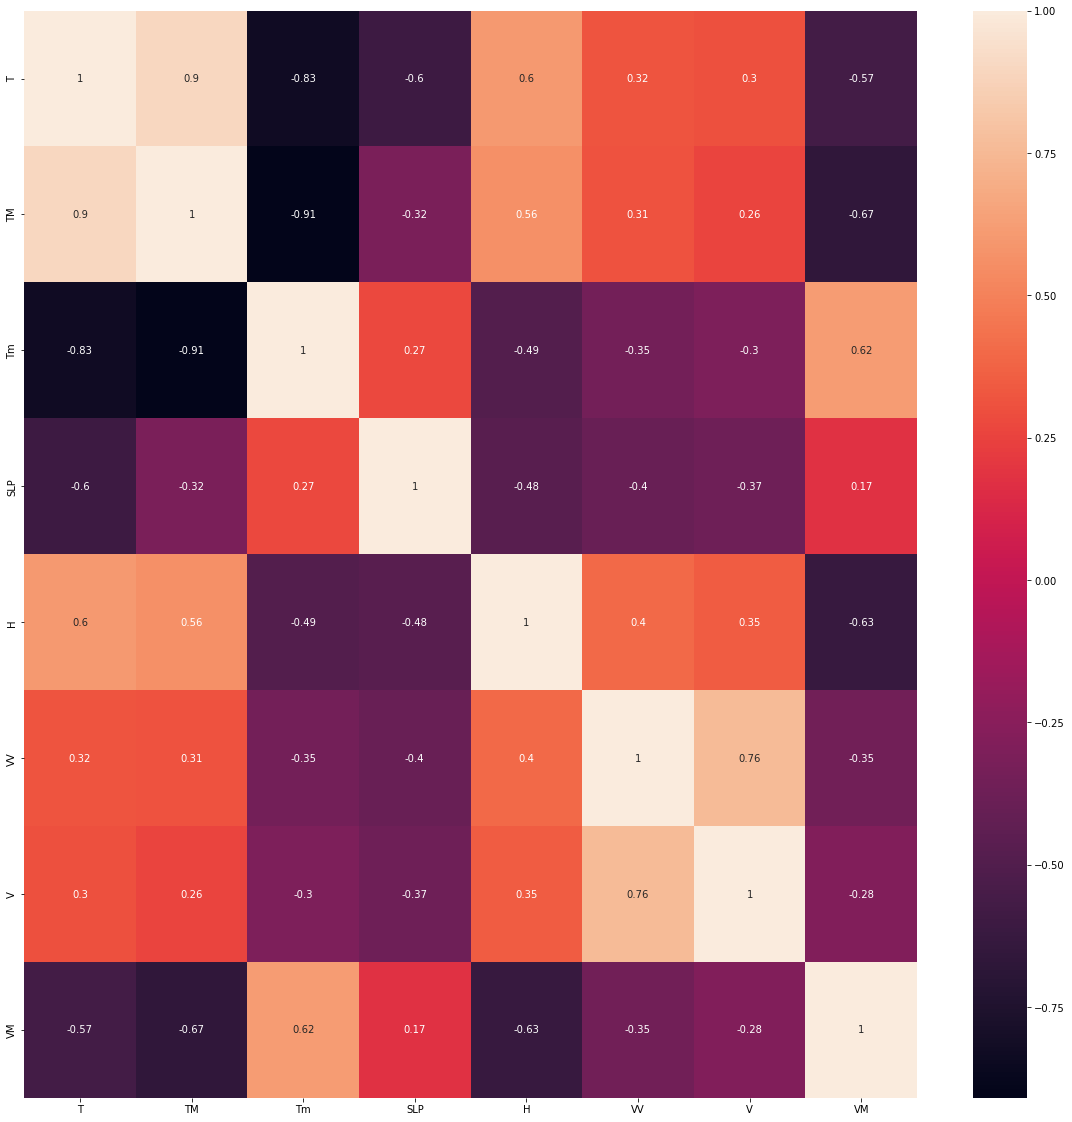

In [8]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
_ = sns.heatmap(df[top_corr_features].corr(), annot=True)

In [9]:
from sklearn.ensemble import ExtraTreesRegressor

In [10]:
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [11]:
print(model.feature_importances_)

[0.11634635 0.22673217 0.17213096 0.08973559 0.29233632 0.05697423
 0.04574438]


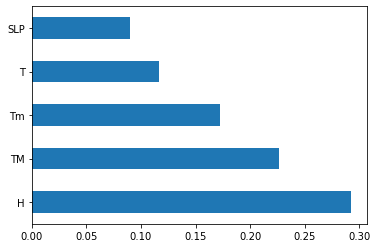

In [12]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

C:\Users\madha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='VM', ylabel='Density'>

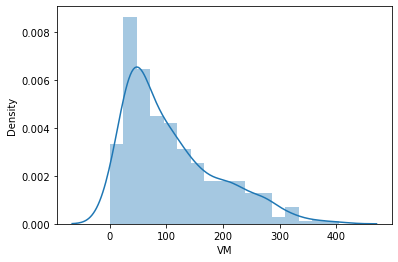

In [13]:
sns.distplot(y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
print("R2 score(on train set): {}".format(model.score(X_train, y_train)))
print("R2 score(on test set): {}".format(model.score(X_test, y_test)))

R2 score(on train set): 0.6000272467421239
R2 score(on test set): 0.5314318525543621


In [17]:
score = cross_val_score(model, X, y, cv = 5)
print("Cross validation score: {}".format(score.mean()))

Cross validation score: 0.4677246298899423


In [18]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
T,1.443889
TM,-6.203354
Tm,0.282866
SLP,-1.000688
H,-49.215503
VV,-2.953992
V,-0.056844


C:\Users\madha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='VM', ylabel='Density'>

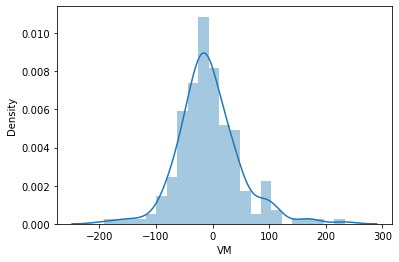

In [19]:
prediction = model.predict(X_test)
sns.distplot(y_test-prediction)

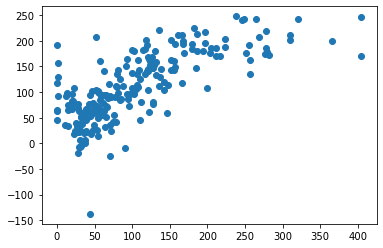

In [20]:
plt.scatter(y_test,prediction)

In [21]:
print("MAE: ",metrics.mean_absolute_error(y_test, prediction))
print("MSE: ",metrics.mean_squared_error(y_test, prediction))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE:  40.445119601011626
MSE:  3058.884950272801
RMSE:  55.30718714844212
